In [1]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [2]:
%whos

Variable   Type      Data/Info
------------------------------
keras      module    <module 'tensorflow.keras<...>low\\keras\\__init__.py'>


In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
%whos

Variable       Type       Data/Info
-----------------------------------
keras          module     <module 'tensorflow.keras<...>low\\keras\\__init__.py'>
mnist          module     <module 'tensorflow.keras<...>ets\\mnist\\__init__.py'>
test_images    ndarray    10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
test_labels    ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
train_images   ndarray    60000x28x28: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
train_labels   ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


In [5]:
print(type(train_images))
print(train_images.dtype)
print(train_images.shape)

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


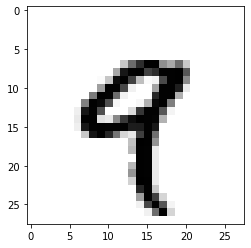

In [13]:
digit = train_images[4]
print(type(digit))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
print(type(train_labels))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 3s 6ms/step - loss: 0.2581 - accuracy: 0.9263: 0s - loss: 0.2693 - accura
Epoch 2/7
469/469 [==============================] - 3s 6ms/step - loss: 0.1034 - accuracy: 0.9695
Epoch 3/7
469/469 [==============================] - 3s 6ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 4/7
469/469 [==============================] - 3s 6ms/step - loss: 0.0505 - accuracy: 0.9856
Epoch 5/7
469/469 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 6/7
469/469 [==============================] - 3s 5ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 7/7
469/469 [==============================] - 3s 6ms/step - loss: 0.0220 - accuracy: 0.9937


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 920us/step - loss: 0.0750 - accuracy: 0.9788


In [22]:
print('test_acc:', test_acc)

test_acc: 0.9787999987602234
